In [6]:
import numpy as np
from collections import Counter

#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

from numpy.lib.stride_tricks import sliding_window_view as ws_split
from skimage.filters import threshold_otsu

from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score

from seaborn import heatmap
import numpy as np
import matplotlib.pyplot as plt

#import sys
#sys.path.append('/content/drive/MyDrive/TesisNotebooks')

from PQmodel import PQ
#from numba import jit

In [7]:
catalog=['Pure sinusoidal [0]', 'Sag[1]', 'Swell[2]','Interruption[3]','Transient/Impulse/Spike[4]',
         'Oscillatory transient [5]','Harmonics[6]','Harmonics with Sag[7]', 'Harmonics with Swell[8]',
         'Flicker[9]', 'Flicker with Sag[10]', 'Flicker with Swell[11]', 'Sag with Oscillatory transient[12]',
         'Swell with Oscillatory transient [13]', 'Sag with Harmonics [14]', 'Swell with Harmonics [15]', 'Notch [16]',
         'Harmonics with Sag with Flicker [17]', 'Harmonics with Swell with Flicker [18]',  'Sag with Harmonics with Flicker [19]',
         'Swell with Harmonics with Flicker [20]', 'Sag with Harmonics with Oscillatory transient [21]',
         'Swell with Harmonics with Oscillatory transient [22]', 'Harmonics with Sag with Oscillatory transient [23]',
         'Harmonics with Swell with Oscillatory transient [24]','Harmonics with Sag with Flicker with Oscillatory transient [25]',
         'Harmonics with Swell with Flicker with Oscillatory transient [26]', 'Sag with Harmonics with Flicker with Oscillatory transient [27]'
         'Swell with Harmonics with Flicker with Oscillatory transient [28]']

In [8]:
cicolosdist=10
Prueba = PQ(Cicles=cicolosdist,PeriodoDisturbio=cicolosdist,InicioDisturbio=0,FS=3841)

In [9]:
datos = Prueba.PQaleatorio(300)
datosp=  Prueba.PQaleatorio(10)
datos.shape

(300, 29, 640)

In [10]:
def build_data(data,cs=16):
    Muestras,tSenal,LSenal=data.shape
    db,dbl=[],[]
    for j in range(Muestras):
        for k in range (tSenal):
            s = data[j,k]
            sd= ws_split(s,window_shape=cs)
            for iw in range(len(sd)):
                db.append(sd[iw])
                dbl.append(k)

    return np.array(db),np.array(dbl)

In [9]:
dd2,target=build_data(datos,cs=128)

In [10]:
model=KNeighborsClassifier()

In [11]:
ddP,targetP=build_data(datosp,cs=128)

In [12]:
model.fit(dd2,target)

KNeighborsClassifier()

In [13]:
yp=model.predict(ddP) 

In [14]:
cmt =confusion_matrix(yp,targetP) 
f1_score(yp,targetP,average='weighted')

0.47782753048513277

<Axes: >

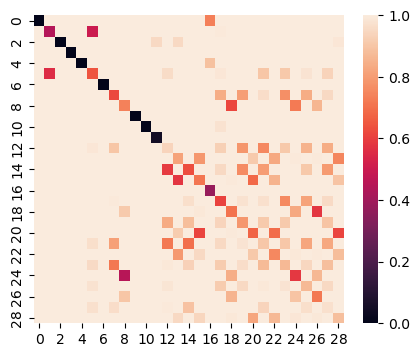

In [15]:
fig, ax = plt.subplots(figsize=(5,4))
heatmap(1-cmt/np.bincount(targetP), ax=ax)